In [1]:
print("hello world")

hello world


In [2]:
from pybaseball import statcast

In [3]:
# data = statcast(start_dt="2022-04-01", end_dt="2022-09-30")
# data.head()

In [4]:
# data_ohtani = data[data['player_name']=='Ohtani, Shohei']
# data_ohtani.to_csv("data/2022_Ohtani.csv")
# data_ohtani.head()

# 大谷翔平の2022年のデータを分析する！！！

In [5]:
# Python3.12だった場合、importエラーになる。
# 対処方法は以下のサイトに記載されていました。
# https://teratail.com/questions/ispptkd2y6ai7t
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/2022_Ohtani.csv")
df.head(1)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,...,4,0,4,0,4,Standard,Standard,65.0,0.018,-0.461


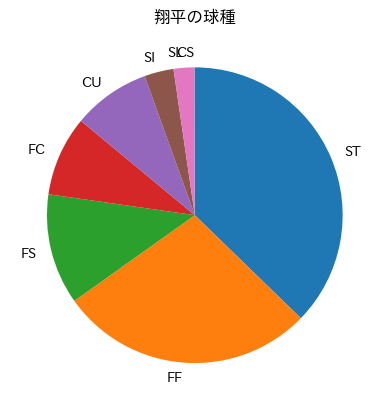

In [7]:
# 球種割合グラフを作成
counts = df["pitch_type"].value_counts()
plt.pie(counts, labels=counts.index, counterclock=False, startangle=90)
plt.title('翔平の球種')
plt.show()

# 球種ごとの平均球速を示すグラフ

In [8]:
df["speed_km"] = df["release_speed"]*1.61
df.head(1)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,speed_km
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,...,0,4,0,4,Standard,Standard,65.0,0.018,-0.461,137.816


In [9]:
# 球種ごとに分類
Fastball = df[df["pitch_type"]=="FF"]
Cutter   = df[df["pitch_type"]=="FC"]
Sweeper  = df[df["pitch_type"]=="ST"]
Curve    = df[df["pitch_type"]=="CU"]
Splitter = df[df["pitch_type"]=="FS"]

In [10]:
x = ["ストレート", "カット", "スイーパー", "カーブ", "スプリット"]
y = [Fastball["speed_km"].mean(), Cutter["speed_km"].mean(),Sweeper["speed_km"].mean(),Curve["speed_km"].mean(),Splitter["speed_km"].mean()]

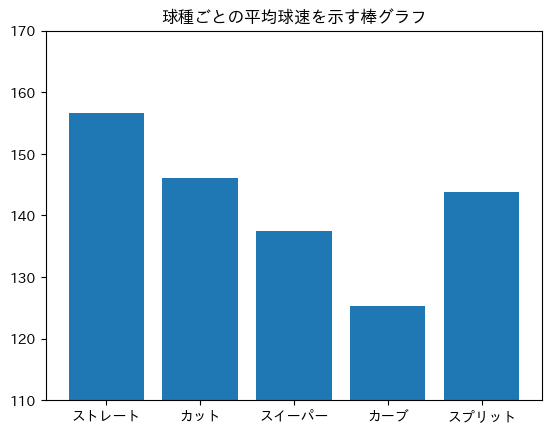

In [11]:
plt.bar(x, y)
plt.title("球種ごとの平均球速を示す棒グラフ")
plt.ylim(110, 170)
plt.show()

# イニングごとの折れ線グラフ

In [12]:
x, y = [], []

for i in range(1, 10):
    inning = Fastball[Fastball["inning"]==i]
    x.append(i)
    y.append(inning["speed_km"].mean())

y

[155.9563459119497,
 156.48946456692912,
 156.27350000000004,
 156.79364367816092,
 157.2165,
 157.84931944444443,
 156.4115,
 156.975,
 nan]

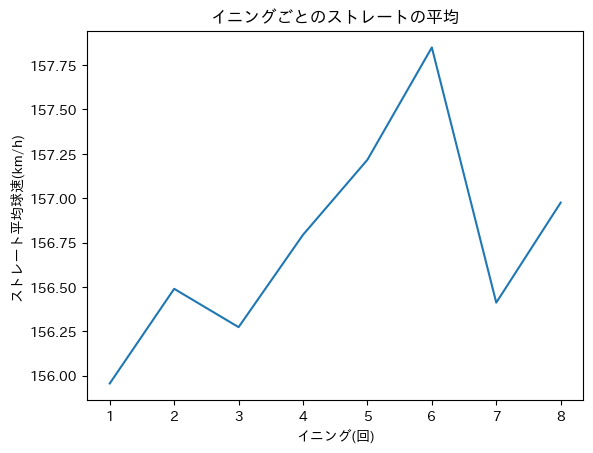

In [13]:
plt.plot(x, y)
plt.title("イニングごとのストレートの平均")
plt.xlabel("イニング(回)")
plt.ylabel("ストレート平均球速(km/h)")
plt.show()

# ヒストグラムを作成

C:\Users\81901\AppData\Local\Temp\ipykernel_268\1726424323.py:4: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "○". Passing invalid values is deprecated since 3.4 and will become an error in 3.9.
  plt.hist(Cutter["speed_km"], alpha=0.7, hatch='○', label="カット", bins=border)


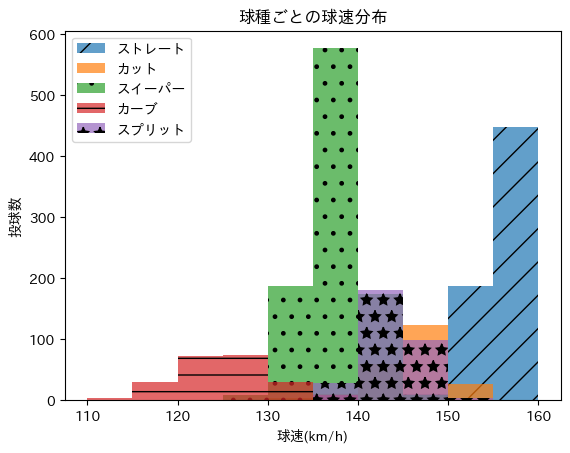

In [14]:
border = [110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 160]

plt.hist(Fastball["speed_km"], alpha=0.7, hatch='/', label="ストレート", bins=border)
plt.hist(Cutter["speed_km"], alpha=0.7, hatch='○', label="カット", bins=border)
plt.hist(Sweeper["speed_km"], alpha=0.7, hatch='.', label="スイーパー", bins=border)
plt.hist(Curve["speed_km"], alpha=0.7, hatch='-', label="カーブ", bins=border)
plt.hist(Splitter["speed_km"], alpha=0.7, hatch='*', label="スプリット", bins=border)

plt.title("球種ごとの球速分布")
plt.xlabel("球速(km/h)")
plt.ylabel("投球数")
plt.legend(loc="upper left")
plt.show()

# 投球の到達位置を表す散布図

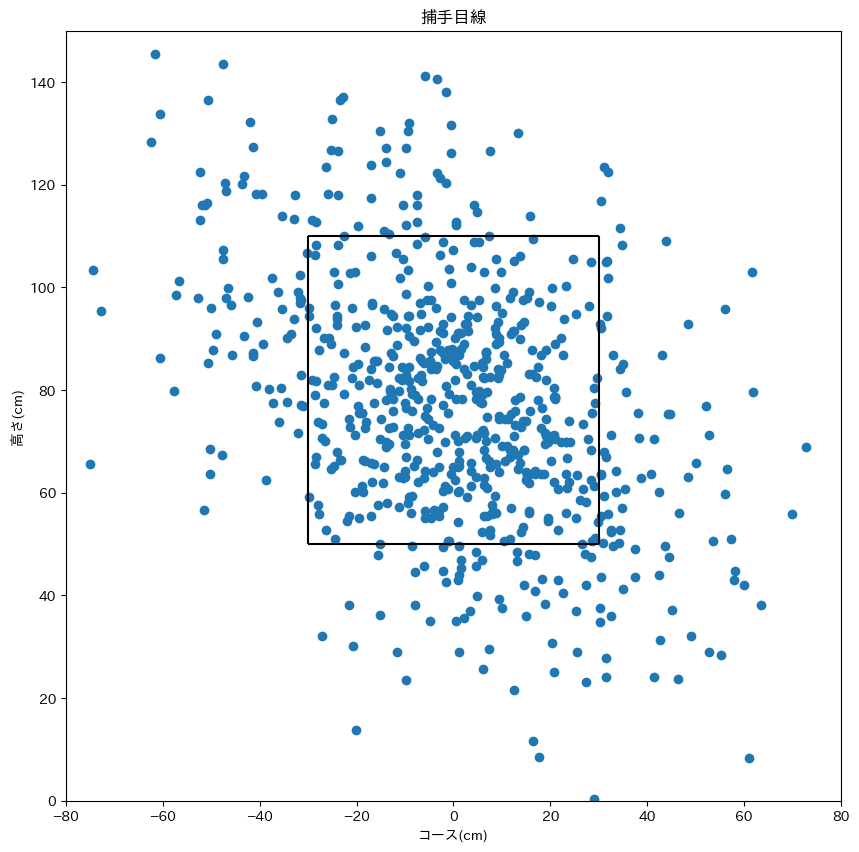

In [15]:
df["plate_x_cm"] = df["plate_x"]*30.48
df["plate_z_cm"] = df["plate_z"]*30.48

df

Fastball = df[df["pitch_type"]=="FF"]

# 散布図を作成
plt.figure(figsize=(10, 10))
plt.scatter(Fastball["plate_x_cm"], Fastball["plate_z_cm"])

# 見た目調整
plt.title("捕手目線")
plt.xlabel("コース(cm)")
plt.ylabel("高さ(cm)")
plt.xlim(-80, 80)
plt.ylim(0, 150)
plt.hlines(y=[50, 110], xmin=-30, xmax=30, color="black")
plt.vlines(x=[-30, 30], ymin=50, ymax=110, color="black")
plt.show()

In [16]:
# 空振りと見逃し抽出
Swinging = Fastball[Fastball['description'].isin(['swinging_strike', 'swinging_strike_blocked'])] 
Called = Fastball[Fastball['description']=='called_strike']

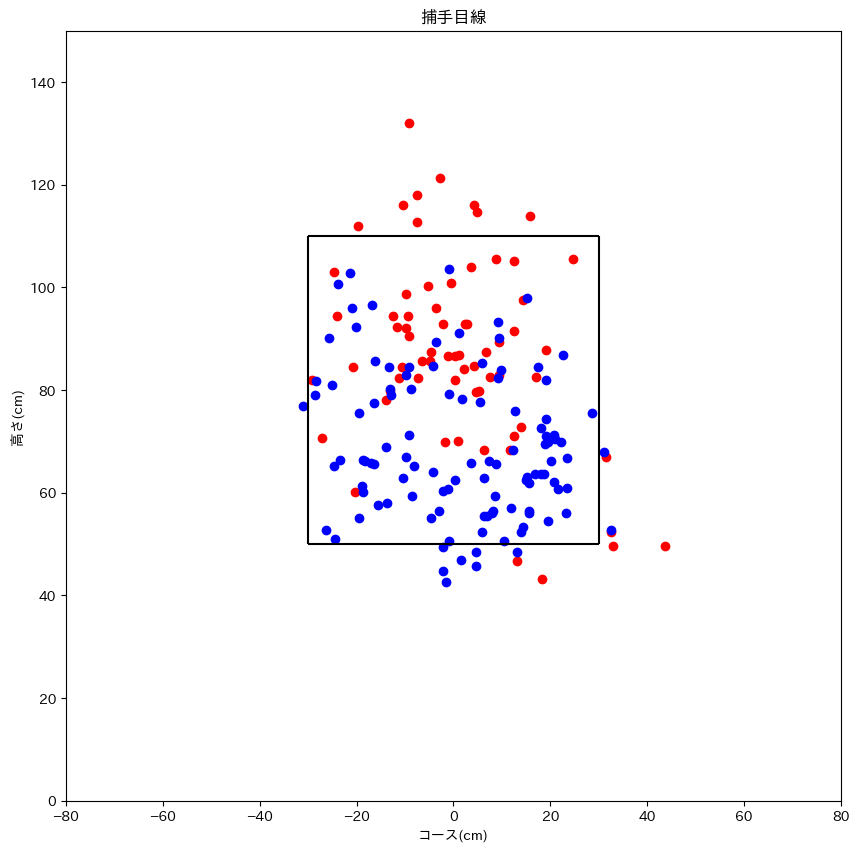

In [17]:
# 散布図を作成
plt.figure(figsize=(10, 10))
plt.scatter(Swinging['plate_x_cm'], Swinging['plate_z_cm'], color='red', label='空振り') 
plt.scatter(Called['plate_x_cm'], Called['plate_z_cm'], color='blue', label='見逃し')

# 見た目調整
plt.title("捕手目線")
plt.xlabel("コース(cm)")
plt.ylabel("高さ(cm)")
plt.xlim(-80, 80)
plt.ylim(0, 150)
plt.hlines(y=[50, 110], xmin=-30, xmax=30, color="black")
plt.vlines(x=[-30, 30], ymin=50, ymax=110, color="black")
plt.show()

In [19]:
df['plate_x_cm'] = df['plate_x'] * 30.48
df['plate_z_cm'] = df['plate_z'] * 30.48
df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,speed_km,plate_x_cm,plate_z_cm
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,...,0,4,Standard,Standard,65.0,0.018,-0.461,137.816,10.6680,101.4984
1,1,ST,2022-09-29,84.3,-2.58,5.64,"Ohtani, Shohei",669127,660271,NaN,...,0,4,Standard,Standard,63.0,0.000,0.000,135.723,9.7536,49.3776
2,2,ST,2022-09-29,84.7,-3.19,5.48,"Ohtani, Shohei",669127,660271,NaN,...,0,4,Standard,Standard,69.0,0.000,0.104,136.367,57.6072,72.2376
3,3,ST,2022-09-29,84.7,-2.63,5.70,"Ohtani, Shohei",669127,660271,NaN,...,0,4,Standard,Standard,64.0,0.000,0.000,136.367,-20.1168,73.4568
4,4,SL,2022-09-29,83.2,-1.96,6.26,"Ohtani, Shohei",669127,660271,NaN,...,0,4,Standard,Standard,70.0,0.000,0.000,133.952,-25.2984,101.4984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,1748,FS,2022-04-07,91.8,-1.76,6.04,"Ohtani, Shohei",514888,660271,strikeout,...,0,0,Standard,Standard,234.0,0.022,-0.195,147.798,-27.1272,62.4840
2556,1784,ST,2022-04-07,86.9,-2.29,5.77,"Ohtani, Shohei",514888,660271,NaN,...,0,0,Standard,Standard,92.0,0.000,-0.066,139.909,-19.5072,53.0352
2557,1844,FF,2022-04-07,99.2,-2.13,5.87,"Ohtani, Shohei",514888,660271,NaN,...,0,0,Standard,Standard,207.0,0.000,0.049,159.712,46.6344,56.0832
2558,1904,FF,2022-04-07,97.9,-2.16,5.89,"Ohtani, Shohei",514888,660271,NaN,...,0,0,Standard,Standard,206.0,0.000,-0.043,157.619,-18.8976,61.2648


In [22]:
# コースを集計するためのリスト
location = [
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
# 投球数
total = 0

for height, side in zip(Fastball["plate_z_cm"], Fastball["plate_x_cm"]):
    
    # 上下位置や左右位置がストライク以外の場合スキップ
    if height<50 or 110<height:
        continue
    if side<-30 or 30<side:
        continue
    
    # 上下判定
    if 90< height <= 110:
        h = 0
    elif 70 <= height <= 90:
        h = 1
    elif 50 <= height < 70:
        h = 2
    
    # 左右判定
    if -30 <= side < -10:
        s = 0
    elif -10 <= side <= 10:
        s = 1
    elif 10 < side <= 30:
        s = 2

    # 集計
    location[h][s] += 1
    total += 1

location
    

[[30, 49, 24], [56, 94, 46], [37, 61, 55]]

In [24]:
# コース別投球割合
raito = []

# 各コースの割合算出
for lst in location:
    add = [num/total for num in lst]
    raito.append(add)
raito

[[0.06637168141592921, 0.1084070796460177, 0.05309734513274336],
 [0.12389380530973451, 0.2079646017699115, 0.10176991150442478],
 [0.08185840707964602, 0.13495575221238937, 0.12168141592920353]]

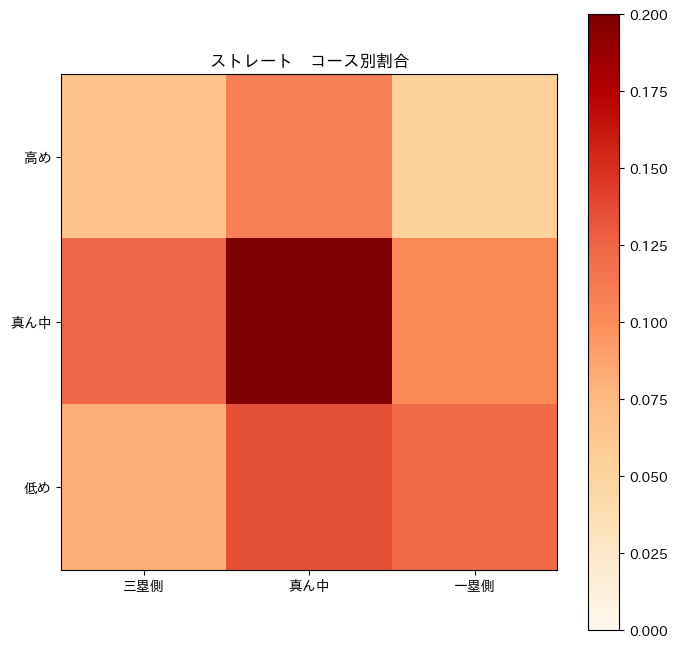

In [26]:
# ヒートマップ作成
plt.figure(figsize=(8, 8))
plt.imshow(raito, cmap="OrRd")

# 見た目調整
plt.colorbar()
plt.clim(0, 0.2)
plt.title("ストレート　コース別割合")
plt.xticks([0, 1, 2], ["三塁側", "真ん中", "一塁側"])
plt.yticks([0, 1, 2], ["高め", "真ん中", "低め"])
plt.show()

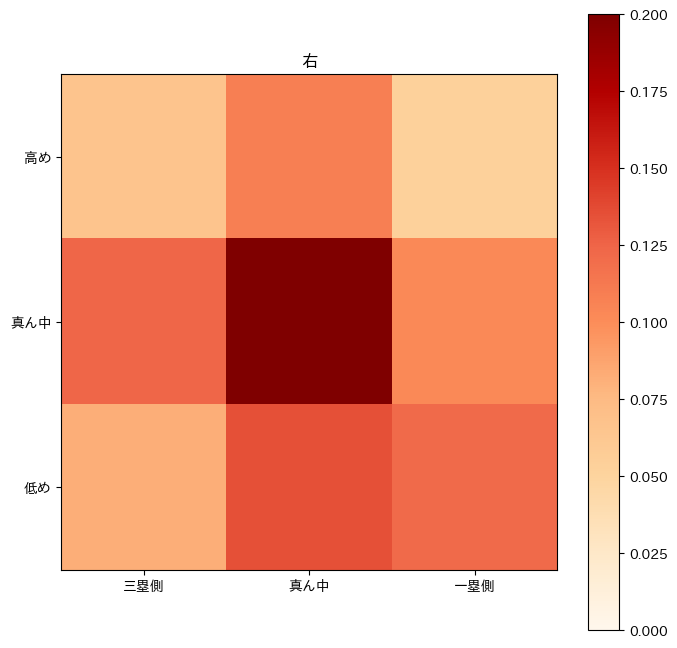

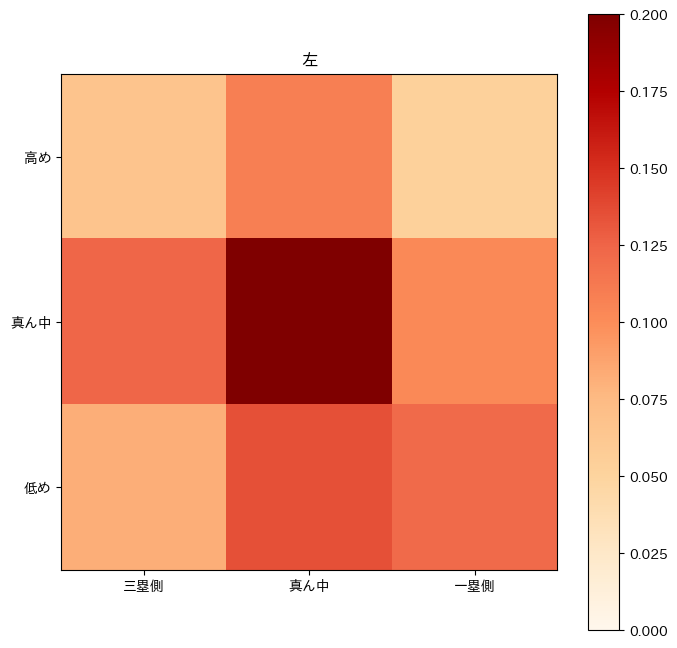

In [38]:
def create_heatmap(data, title):
    # コースを集計するためのリスト
    location = [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ]
    # 投球数
    sum = 0

    for height, side in zip(Fastball["plate_z_cm"], Fastball["plate_x_cm"]):
        
        # 上下位置や左右位置がストライク以外の場合スキップ
        if height<50 or 110<height:
            continue
        if side<-30 or 30<side:
            continue
        
        # 上下判定
        if 90< height <= 110:
            h = 0
        elif 70 <= height <= 90:
            h = 1
        elif 50 <= height < 70:
            h = 2
        
        # 左右判定
        if -30 <= side < -10:
            s = 0
        elif -10 <= side <= 10:
            s = 1
        elif 10 < side <= 30:
            s = 2

        # 集計
        location[h][s] += 1
        sum += 1

    # コース別投球割合
    raito = []
    for lst in location:
        add = []
        for num in lst:
            add.append(num/sum)
        raito.append(add)

    # ヒートマップ作成
    plt.figure(figsize=(8, 8))
    plt.imshow(raito, cmap="OrRd")

    # 見た目調整
    plt.colorbar()
    plt.clim(0, 0.2)
    plt.title(title)
    plt.xticks([0, 1, 2], ["三塁側", "真ん中", "一塁側"])
    plt.yticks([0, 1, 2], ["高め", "真ん中", "低め"])
    plt.show()


# 打席
Fastball_Right = Fastball[Fastball["stand"]=="R"]
Fastball_Left = Fastball[Fastball["stand"]=="L"]
Fastball_Left
    
# 作成した関数
create_heatmap(Fastball_Right, "右")
create_heatmap(Fastball_Left, "左")
